# import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import warnings 
warnings.filterwarnings("ignore")


# Data Collection 

In [2]:
df = pd.read_csv(r"C:\Users\Rohan\Pictures\rohan\csv. file\data.csv")

In [3]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1


In [4]:
df.shape


(893, 18)

# Data Preprocessing

In [5]:
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0','resolution_width','resolution_height']
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
df.isnull().sum()

brand           0
name            0
price           0
spec_rating     0
processor       0
CPU             0
Ram             0
Ram_type        0
ROM             0
ROM_type        0
GPU             0
display_size    0
OS              0
warranty        0
dtype: int64

In [7]:
df['spec_rating'] = df['spec_rating'].astype(int)

In [8]:
df.sample(3)

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty
207,Asus,Vivobook S15 OLED K3502ZA-L501WS Laptop,72490,64,12th Gen Intel Core i5 12500H,"12 Cores (4P + 8E), 16 Threads",16GB,DDR4,512GB,SSD,Intel Iris XE Graphics,15.6,Windows 11 OS,1
838,MSI,Modern 14 C12M-444IN Laptop,36990,62,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",16GB,DDR4,512GB,SSD,Intel Integrated UHD,14.0,Windows 11 OS,1
419,Gigabyte,G5 KE RC55KE Laptop,74990,73,12th Gen Intel Core i5 12500H,"12 Cores (4P + 8E), 16 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,Windows 11 OS,2


# Exploratory Data Analssis

In [9]:
df.groupby('brand')['price'].min().sort_values(ascending=False)

brand
Razer        199990
Ninkear       79999
LG            78299
Gigabyte      74990
Apple         69990
Fujitsu       64990
Microsoft     60390
Huawei        54999
Samsung       49990
Xiaomi        43990
Honor         41990
Vaio          39990
Realme        36999
Tecno         34999
MSI           33990
Zebronics     33990
Dell          31490
Wings         29990
Chuwi         23990
Infinix       23990
Avita         21990
Lenovo        18990
Walker        16990
HP            15990
Acer          13990
AXL           12990
Ultimus       10990
Primebook     10990
Asus          10990
iBall          9999
Name: price, dtype: int64

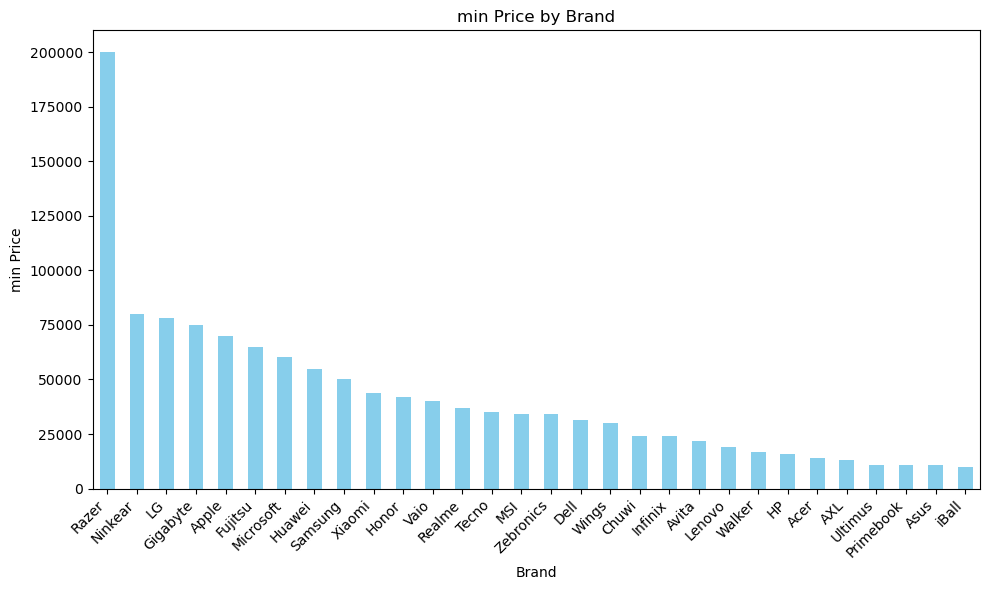

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

brand_price_mean = df.groupby('brand')['price'].min().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
brand_price_mean.plot(kind='bar', color='skyblue')
plt.title('min Price by Brand')
plt.xlabel('Brand')
plt.ylabel('min Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


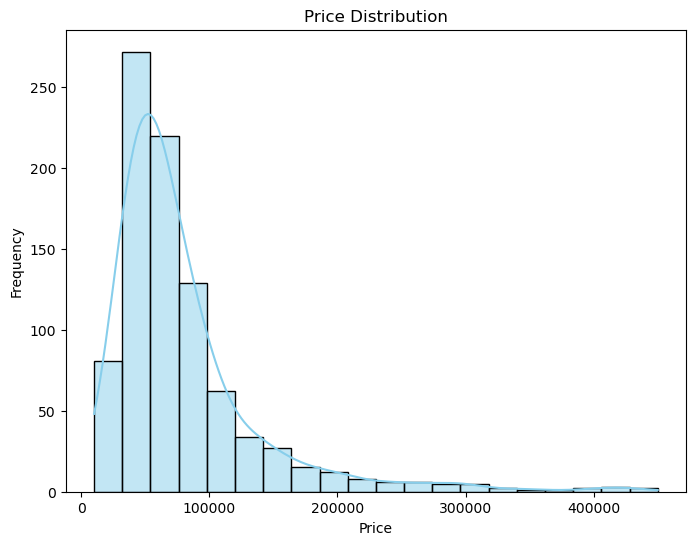

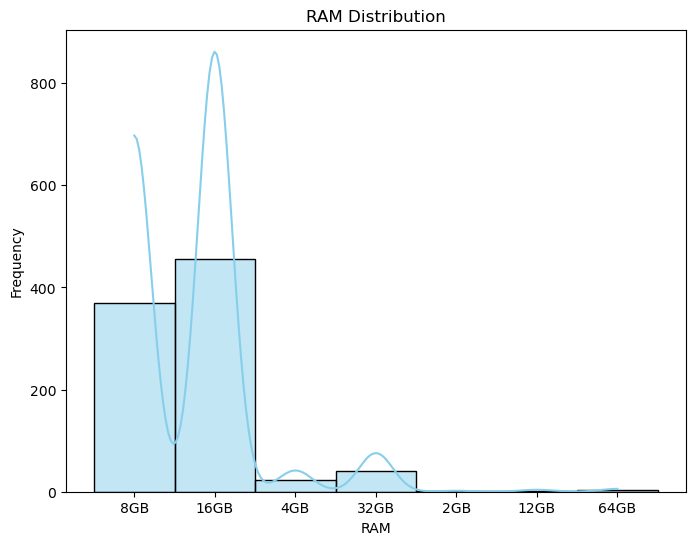

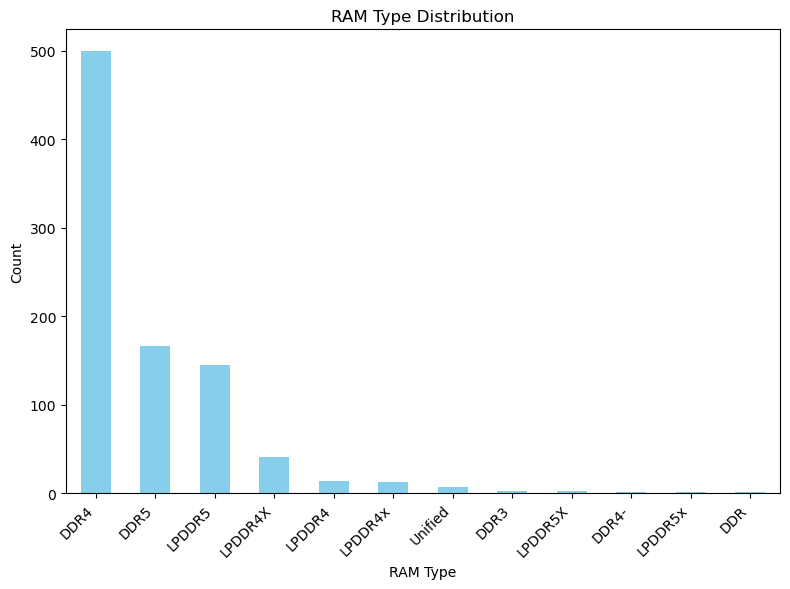

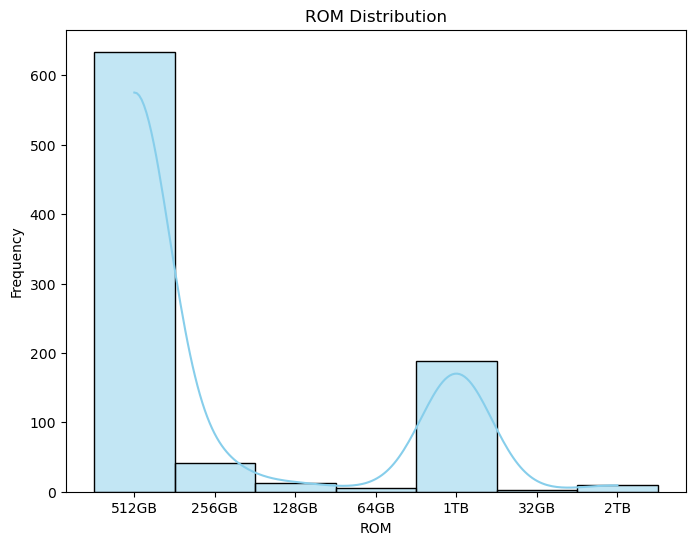

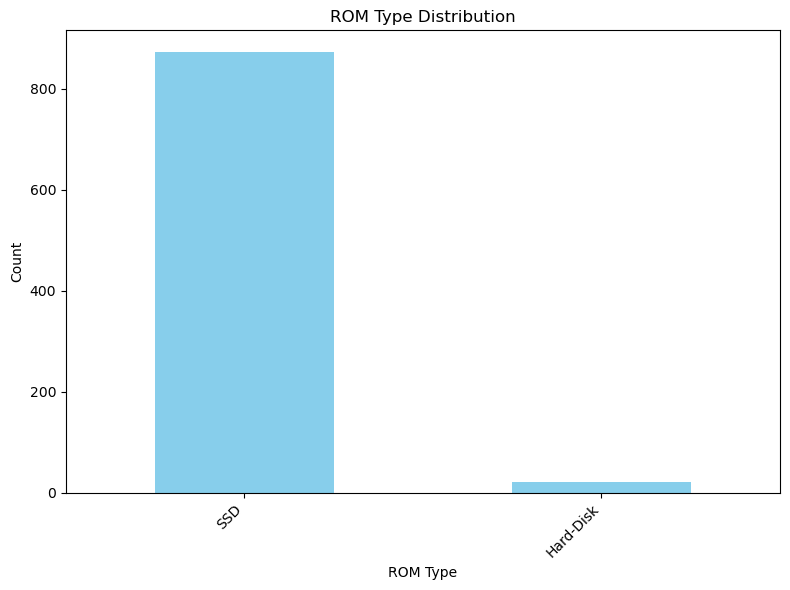

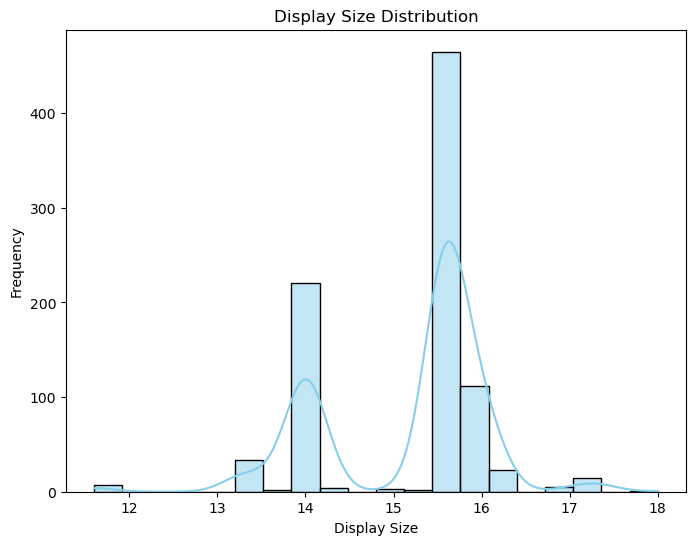

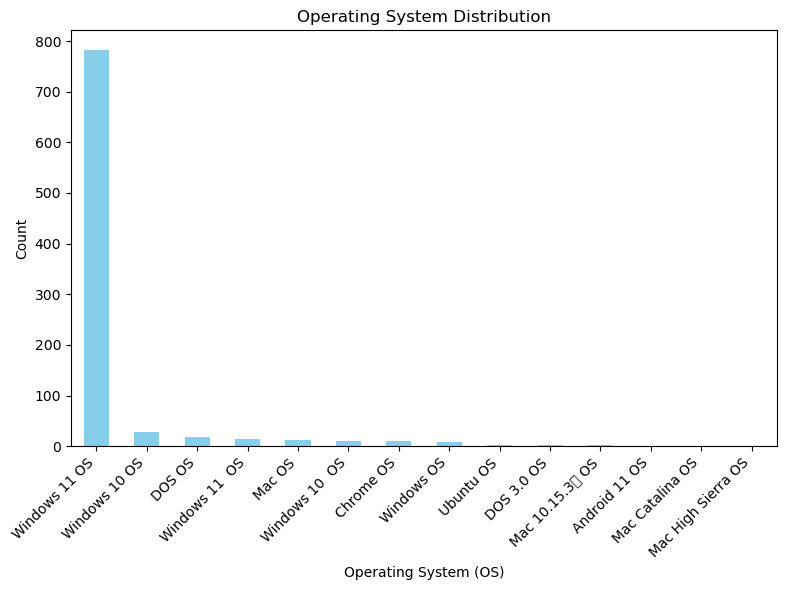

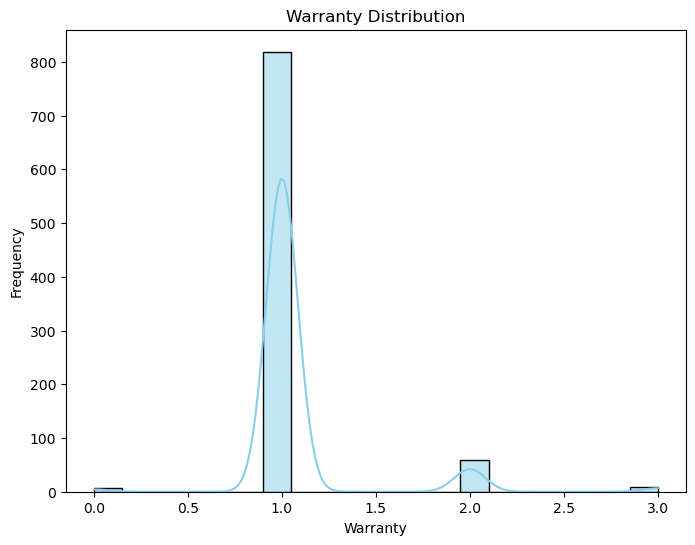

In [11]:
# Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=20, color='skyblue', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

# RAM Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Ram'], bins=20, color='skyblue', kde=True)
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('RAM Distribution')
plt.show()

# RAM Type Distribution
plt.figure(figsize=(8, 6))
df['Ram_type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('RAM Type')
plt.ylabel('Count')
plt.title('RAM Type Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ROM Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['ROM'], bins=20, color='skyblue', kde=True)
plt.xlabel('ROM')
plt.ylabel('Frequency')
plt.title('ROM Distribution')
plt.show()

# ROM Type Distribution
plt.figure(figsize=(8, 6))
df['ROM_type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('ROM Type')
plt.ylabel('Count')
plt.title('ROM Type Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Display Size Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['display_size'], bins=20, color='skyblue', kde=True)
plt.xlabel('Display Size')
plt.ylabel('Frequency')
plt.title('Display Size Distribution')
plt.show()

# OS Distribution
plt.figure(figsize=(8, 6))
df['OS'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Operating System (OS)')
plt.ylabel('Count')
plt.title('Operating System Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Warranty Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['warranty'], bins=20, color='skyblue', kde=True)
plt.xlabel('Warranty')
plt.ylabel('Frequency')
plt.title('Warranty Distribution')
plt.show()

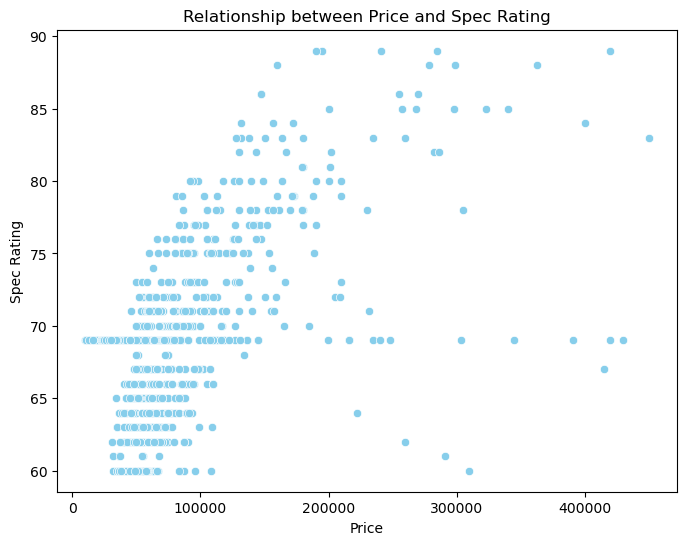

In [12]:
# Relationship between Price and spec_rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='spec_rating', color='skyblue')
plt.xlabel('Price')
plt.ylabel('Spec Rating')
plt.title('Relationship between Price and Spec Rating')
plt.show()


# checking ['price','spec_rating'] clusters for better identify data

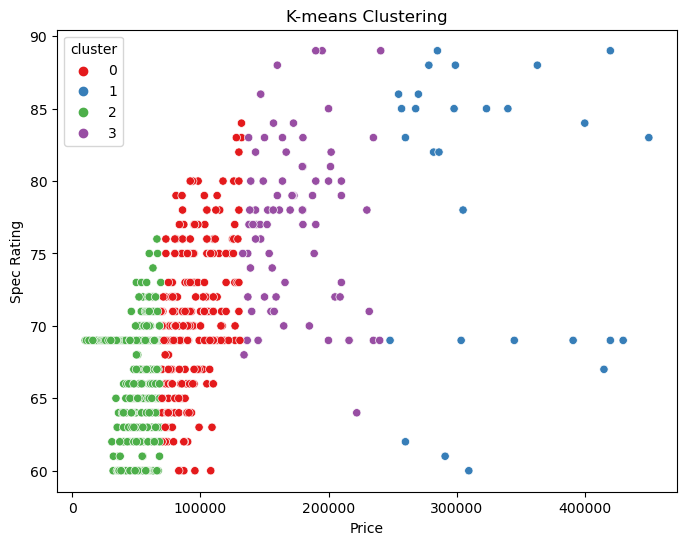

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[['price', 'spec_rating']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='spec_rating', hue='cluster', palette='Set1', legend='full')
plt.xlabel('Price')
plt.ylabel('Spec Rating')
plt.title('K-means Clustering')
plt.show()


# Feature Engineering

In [14]:
df["processor"].value_counts()

processor
12th Gen Intel Core i5 1235U     49
13th Gen Intel Core i5 1335U     41
12th Gen Intel Core i3 1215U     38
11th Gen Intel Core i3 1115G4    36
12th Gen Intel Core i5 12450H    33
                                 ..
5th Gen AMD Ryzen 7  5825U        1
6th Gen AMD Ryzen 9  6900HX       1
12th Gen Intel Core i5 1230U      1
AMD Ryzen 3 7320U                 1
13th Gen ‎Intel Core i3 1315U     1
Name: count, Length: 184, dtype: int64

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df['processor_generation'] = df['processor'].str.extract(r'(\d+)(?:th|nd|st|rd)?\s*Gen', expand=False).astype(float)
df['processor_model'] = df['processor'].str.extract(r'(Intel Core i[3-9]|AMD Ryzen [3-9])', expand=False)

In [16]:
df['processor_power'] = df['processor'].str.split().str[-1]
df['processor_power'].value_counts()

processor_power
1235U     51
1115G4    44
1335U     42
1215U     38
12450H    36
          ..
8250U      1
Intel      1
1265U      1
10110U     1
040        1
Name: count, Length: 116, dtype: int64

In [17]:
df.sample(2)

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,cluster,processor_generation,processor_model,processor_power
440,HP,Pavilion 15s-fq5112TU Laptop,57580,69,12th Gen Intel Core i5 1235U,"10 Cores (2P + 8E), 12 Threads",16GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,15.6,Windows 11 OS,1,2,12.0,Intel Core i5,1235U
622,HP,255 G9 841W6PA Laptop,26990,69,3rd Gen AMD Ryzen 3 3250U,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,AMD Radeon Graphics,15.6,DOS 3.0 OS,1,2,3.0,AMD Ryzen 3,3250U


In [18]:
df.processor.value_counts()

processor
12th Gen Intel Core i5 1235U     49
13th Gen Intel Core i5 1335U     41
12th Gen Intel Core i3 1215U     38
11th Gen Intel Core i3 1115G4    36
12th Gen Intel Core i5 12450H    33
                                 ..
5th Gen AMD Ryzen 7  5825U        1
6th Gen AMD Ryzen 9  6900HX       1
12th Gen Intel Core i5 1230U      1
AMD Ryzen 3 7320U                 1
13th Gen ‎Intel Core i3 1315U     1
Name: count, Length: 184, dtype: int64

In [19]:
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,cluster,processor_generation,processor_model,processor_power
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,Windows 11 OS,1,2,5.0,AMD Ryzen 5,5600H
1,HP,15s-fq5007TU Laptop,39900,60,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,Windows 11 OS,1,2,12.0,Intel Core i3,1215U
2,Acer,One 14 Z8-415 Laptop,26990,69,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,Windows 11 OS,1,2,11.0,Intel Core i3,1115G4
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,Windows 11 OS,1,2,12.0,Intel Core i5,1240P
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,Mac OS,1,0,NaN,NaN,M1


In [20]:
df.drop("processor",axis =1 , inplace =True)

In [21]:
df['processor_model'] = df['processor_model'].fillna('Other Processor')
df['processor_generation'] = df['processor_generation'].fillna('Other')

In [22]:
df["processor_generation"].value_counts().count()

12

In [23]:
df["processor_model"].value_counts().count()

9

In [24]:
df["processor_power"].value_counts()

processor_power
1235U     51
1115G4    44
1335U     42
1215U     38
12450H    36
          ..
8250U      1
Intel      1
1265U      1
10110U     1
040        1
Name: count, Length: 116, dtype: int64

In [25]:
df.drop("processor_power", axis = 1 , inplace=True)

In [26]:
df['OS'] = df['OS'].apply(lambda x: ' '.join(x.split()[:-1]))

In [27]:
df['ROM'] = df['ROM'].replace('1TB', '1024GB')
df['ROM'] = df['ROM'].replace('2TB', '2048GB')
df['ROM']= df['ROM'].str.replace('GB', ' ')
df['ROM'].astype('int32')

0       512
1       512
2       512
3       512
4       256
       ... 
888     512
889    1024
890    1024
891     512
892    1024
Name: ROM, Length: 893, dtype: int32

In [28]:
df.sample(3)

,brand,name,price,spec_rating,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,cluster,processor_generation,processor_model
389,Asus,Zenbook 14 Flip OLED 2023 UP3404VA-KN542WS Laptop,104490,71,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512,SSD,Intel Iris Xe Graphics,14.0,Windows 11,1,0,13.0,Intel Core i5
846,Dell,Alienware x14 R2 Gaming Laptop,208990,72,"10 Cores (6P + 4E), 16 Threads",16GB,LPDDR5,1024,SSD,6GB NVIDIA GEFORCE RTX 4050,14.0,Windows 11,1,3,13.0,Intel Core i7
608,Fujitsu,CH‎ 4ZR1L82433 Laptop,64990,66,"10 Cores (2P + 8E), 12 Threads",16GB,DDR5,512,SSD,Intel Iris Xe Graphics,13.3,Windows 11,2,2,13.0,Intel Core i5


In [29]:
df["ROM"].value_counts()

ROM
512      634
1024     188
256       42
128       12
2048      10
64         5
32         2
Name: count, dtype: int64

In [30]:
df.sample(3)

,brand,name,price,spec_rating,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,cluster,processor_generation,processor_model
788,Dell,Inspiron 7420 2in1 Laptop,94990,67,"10 Cores (2P + 8E), 12 Threads",16GB,DDR4,512,SSD,Intel Iris Xe Graphics,14.0,Windows 11,1,0,12.0,Intel Core i7
419,Gigabyte,G5 KE RC55KE Laptop,74990,73,"12 Cores (4P + 8E), 16 Threads",16GB,DDR4,512,SSD,6GB NVIDIA GeForce RTX 3060,15.6,Windows 11,2,0,12.0,Intel Core i5
168,Acer,Predator Helios Neo 16 PHN16-71 2023 Gaming La...,129999,78,"16 Cores (8P + 8E), 24 Threads",16GB,DDR5,1024,SSD,8GB NVIDIA GeForce RTX 4060,16.0,Windows 11,1,0,13.0,Intel Core i7


In [31]:
df['Ram']= df['Ram'].str.replace('GB', ' ')


In [32]:
df['Ram'].astype('int32')

0       8
1       8
2       8
3      16
4       8
       ..
888     8
889    16
890    32
891    16
892    16
Name: Ram, Length: 893, dtype: int32

In [33]:
df.GPU.value_counts()

GPU
Intel Iris Xe Graphics          107
Intel UHD Graphics               63
Intel Integrated UHD             61
AMD Radeon AMD                   55
AMD Radeon Graphics              54
                               ... 
4GB NVIDIA GeForce RTX A1000      1
 Intel Iris Xe Graphics           1
19-core GPU                       1
30-core GPU                       1
4GB AMD Radeon RX 5600M           1
Name: count, Length: 134, dtype: int64

In [34]:
df['GPU_category'] = df['GPU'].apply(lambda x: 'NVIDIA' if 'NVIDIA' in x else ('AMD' if 'AMD' in x else 'other'))

print(df[['GPU', 'GPU_category']])

                               GPU GPU_category
0          4GB AMD Radeon RX 6500M          AMD
1               Intel UHD Graphics        other
2           Intel Iris Xe Graphics        other
3         Intel Integrated Iris Xe        other
4     Apple M1 Integrated Graphics        other
..                             ...          ...
888  Integrated Intel UHD Graphics        other
889    6GB NVIDIA GeForce RTX 3060       NVIDIA
890    8GB NVIDIA GeForce RTX 4060       NVIDIA
891    6GB NVIDIA GeForce RTX 4050       NVIDIA
892    6GB NVIDIA GeForce RTX 4050       NVIDIA

[893 rows x 2 columns]


In [35]:
df.drop('GPU', axis=1, inplace=True)

In [36]:
df.sample(2)

,brand,name,price,spec_rating,CPU,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
565,MSI,Bravo 15 B7ED-011IN Gaming Laptop,79990,70,"Octa Core, 16 Threads",16,DDR5,512,SSD,15.6,Windows 11,1,0,7.0,AMD Ryzen 7,AMD
133,Asus,Vivobook S15 OLED 2023 S5504VA-MA543WS Laptop,83990,65,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512,SSD,15.6,Windows 11,1,0,13.0,Intel Core i5,other


In [37]:
df.isnull().sum()

brand                   0
name                    0
price                   0
spec_rating             0
CPU                     0
Ram                     0
Ram_type                0
ROM                     0
ROM_type                0
display_size            0
OS                      0
warranty                0
cluster                 0
processor_generation    0
processor_model         0
GPU_category            0
dtype: int64

In [38]:
df.sample(2)

,brand,name,price,spec_rating,CPU,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
782,Asus,TUF Gaming F15 FX506HF-HN026W Gaming Laptop,58990,71,"Hexa Core, 12 Threads",8,DDR4,1024,SSD,15.6,Windows 11,1,2,11.0,Intel Core i5,NVIDIA
10,Lenovo,V15 G3 IAP 82TTA08AIN Laptop,49990,69,"10 Cores (2P + 8E), 12 Threads",16,DDR4,512,SSD,15.6,Windows 11,1,2,12.0,Intel Core i7,other


In [39]:
df["processor_generation"].value_counts()

processor_generation
12.0     214
13.0     207
11.0     132
7.0      125
5.0      101
Other     55
10.0      18
6.0       17
3.0       16
8.0        4
9.0        2
4.0        2
Name: count, dtype: int64

In [40]:
df.CPU.value_counts()

CPU
Quad Core, 8 Threads               130
Hexa Core, 12 Threads              126
10 Cores (2P + 8E), 12 Threads     125
Octa Core, 16 Threads              102
12 Cores (4P + 8E), 16 Threads      83
Dual Core, 4 Threads                55
14 Cores (6P + 8E), 20 Threads      50
Hexa Core (2P + 4E), 8 Threads      44
Octa Core (4P + 4E), 12 Threads     43
Dual Core, 2 Threads                36
10 Cores (6P + 4E), 16 Threads      26
24 Cores (8P + 16E), 32 Threads     16
16 Cores (8P + 8E), 24 Threads      10
14 Cores (6P + 8E)                   9
5 Cores (1P + 4E), 6 Threads         7
Octa Core (4P + 4E)                  5
Quad Core, 4 Threads                 4
Octa Core, 8 Threads                 4
Octa Core                            3
10 Cores (8P + 2E)                   2
Quad Core                            2
12 Cores                             2
10 Cores, 12 Threads                 2
10 Cores                             2
24 Cores (8P + 16E)                  1
16 Cores, 32 Threads 

In [41]:
df['CPU'] = df['CPU'].str.split().str[0]
cpu_mapping = {'Hexa': 6, 'Octa': 8, 'Quad': 4, 'Dual': 2}

# Replace CPU sizes with numerical values
df['CPU'] = df['CPU'].replace(cpu_mapping)
print(df[['CPU']])

    CPU
0     6
1     6
2     2
3    12
4     8
..   ..
888   6
889   8
890   8
891  14
892   8

[893 rows x 1 columns]


In [42]:
df.rename(columns={'CPU': 'cpu_core'}, inplace=True)

In [43]:
df.sample(4)

,brand,name,price,spec_rating,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
557,Lenovo,IdeaPad Slim 5 82XD005RIN Laptop,71990,69,8,16,LPDDR5,512,SSD,14.0,Windows 11,2,0,13.0,Intel Core i5,other
800,Lenovo,‎ThinkPad E14 Gen 4 21E3S06D00 Laptop,49999,62,6,8,DDR4,512,SSD,14.0,Windows 11,1,2,12.0,Intel Core i3,other
709,Dell,XPS 15 9530 Laptop,256990,85,14,16,DDR5,1024,SSD,15.6,Windows 11,1,1,13.0,Intel Core i7,NVIDIA
459,HP,Pavilion 15s-FQ5009TU Laptop,54999,69,10,8,DDR4,512,SSD,15.6,Windows 11,1,2,12.0,Intel Core i5,other


In [44]:
df.drop(columns=['spec_rating','name'], inplace=True)

In [45]:
df.head()

,brand,price,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
0,HP,49900,6,8,DDR4,512,SSD,15.6,Windows 11,1,2,5.0,AMD Ryzen 5,AMD
1,HP,39900,6,8,DDR4,512,SSD,15.6,Windows 11,1,2,12.0,Intel Core i3,other
2,Acer,26990,2,8,DDR4,512,SSD,14.0,Windows 11,1,2,11.0,Intel Core i3,other
3,Lenovo,59729,12,16,LPDDR5,512,SSD,14.0,Windows 11,1,2,12.0,Intel Core i5,other
4,Apple,69990,8,8,DDR4,256,SSD,13.3,Mac,1,0,Other,Other Processor,other


In [46]:
other_rows = df[df['processor_generation'] =='Other']
other_rows

,brand,price,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
4,Apple,69990,8,8,DDR4,256,SSD,13.3,Mac,1,0,Other,Other Processor,other
11,Ultimus,10990,2,4,DDR4,128,SSD,14.1,Windows 11,1,2,Other,Other Processor,other
13,Primebook,10990,8,4,LPDDR4,64,Hard-Disk,11.6,Android 11,1,2,Other,Other Processor,other
21,Apple,104990,8,8,DDR4,256,SSD,13.6,Mac,1,0,Other,Other Processor,other
27,Acer,28990,8,8,LPDDR5,512,SSD,15.6,Windows 11,1,2,Other,Intel Core i3,other
50,Lenovo,23990,2,8,DDR4,256,SSD,15.6,Windows 11,1,2,Other,Other Processor,other
95,Apple,126990,8,8,DDR4,256,SSD,15.3,Mac,1,0,Other,Other Processor,other
101,Lenovo,18990,2,8,DDR4,256,SSD,14.0,Windows 11,1,2,Other,Other Processor,AMD
105,iBall,9999,4,2,DDR3,32,Hard-Disk,11.6,Windows 10,1,2,Other,Other Processor,other
110,Asus,10990,2,4,LPDDR4,32,Hard-Disk,11.6,Chrome,1,2,Other,Other Processor,other


In [47]:
df.isnull().sum()

brand                   0
price                   0
cpu_core                0
Ram                     0
Ram_type                0
ROM                     0
ROM_type                0
display_size            0
OS                      0
warranty                0
cluster                 0
processor_generation    0
processor_model         0
GPU_category            0
dtype: int64

In [48]:
df.columns

Index(['brand', 'price', 'cpu_core', 'Ram', 'Ram_type', 'ROM', 'ROM_type',
       'display_size', 'OS', 'warranty', 'cluster', 'processor_generation',
       'processor_model', 'GPU_category'],
      dtype='object')

# Outlayer detection

<Axes: >

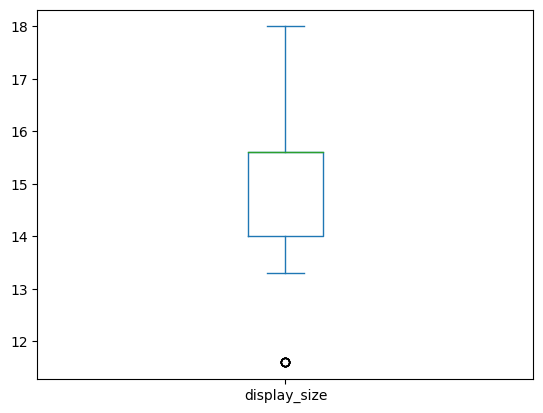

In [49]:
df['display_size'].plot(kind='box')

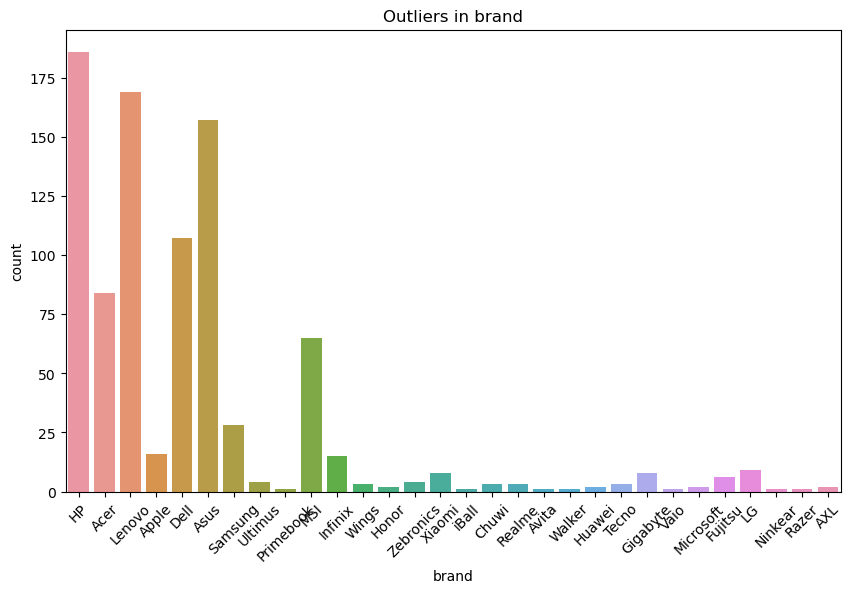

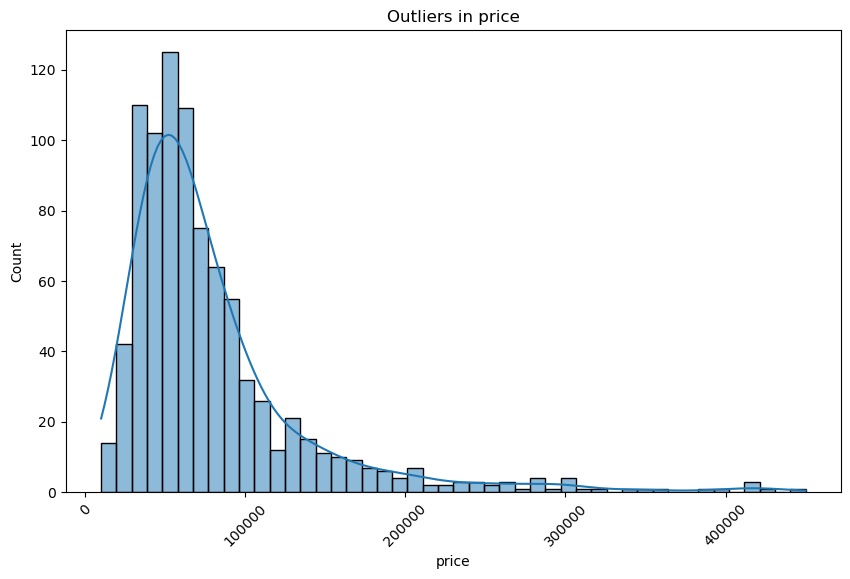

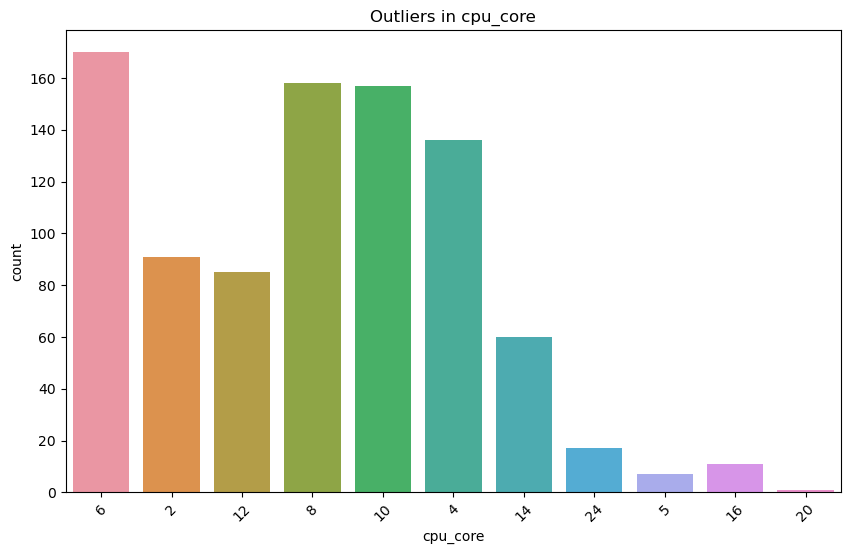

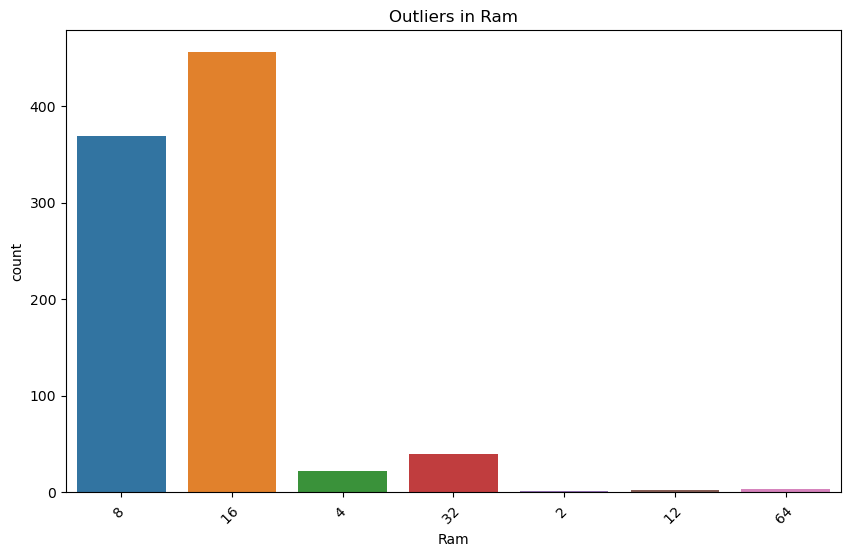

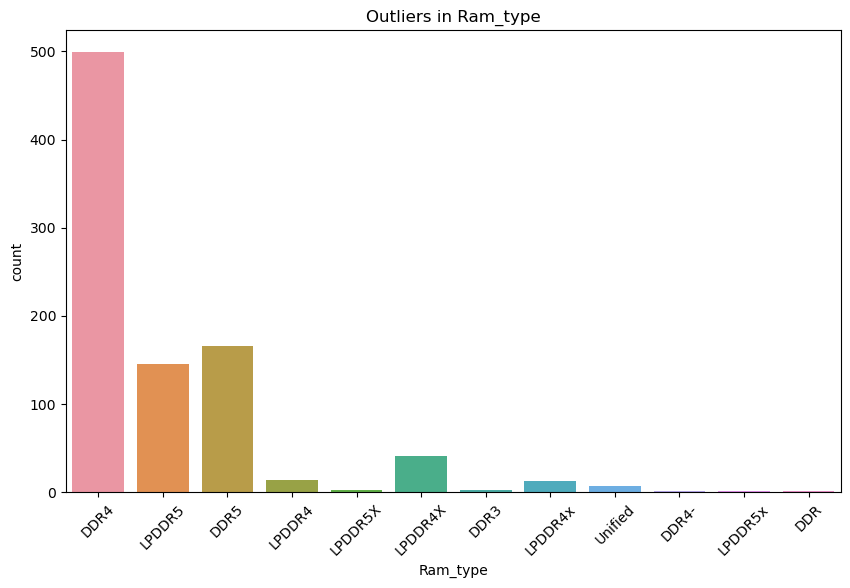

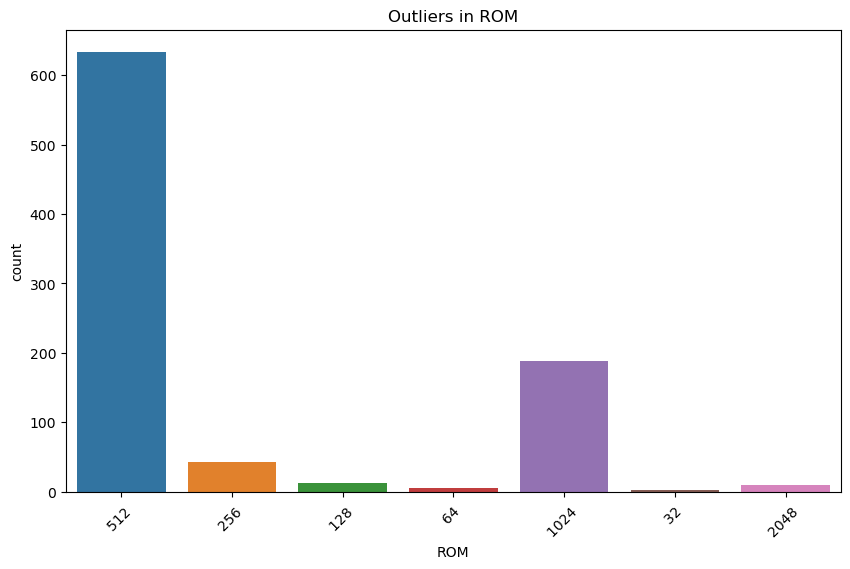

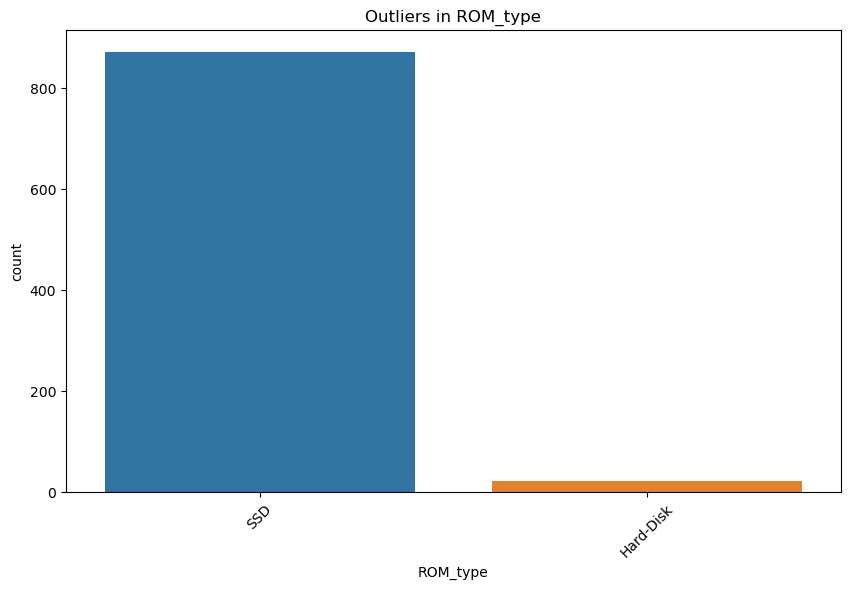

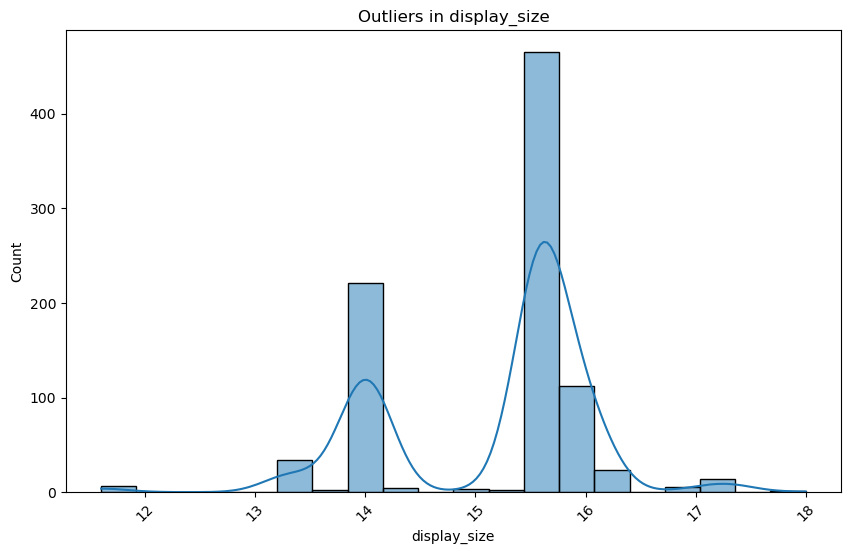

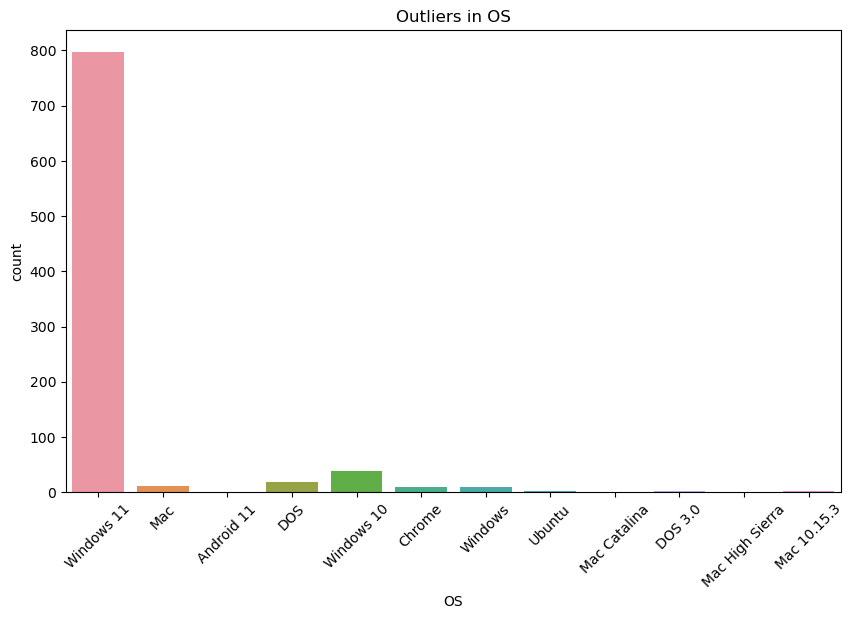

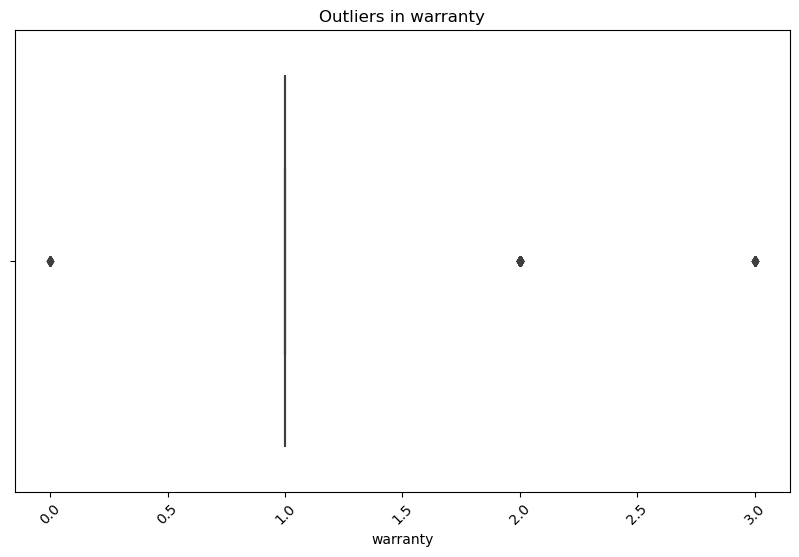

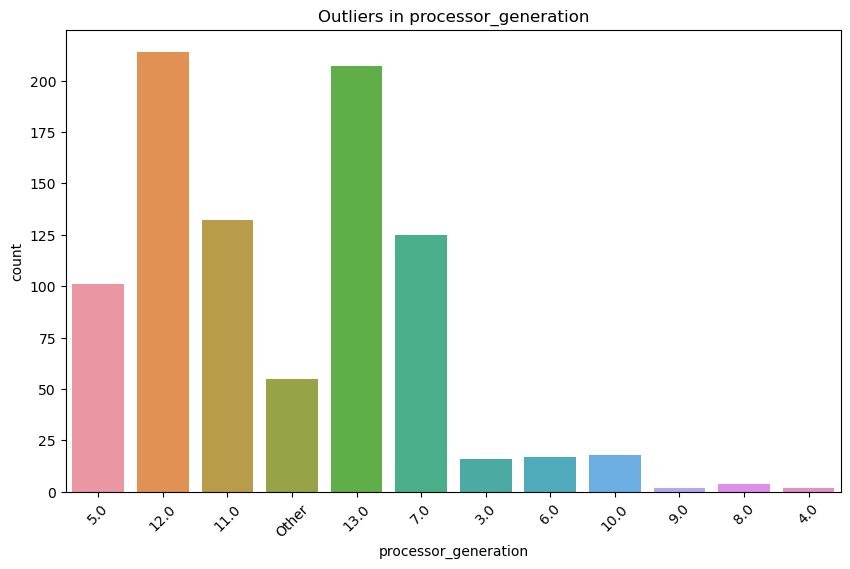

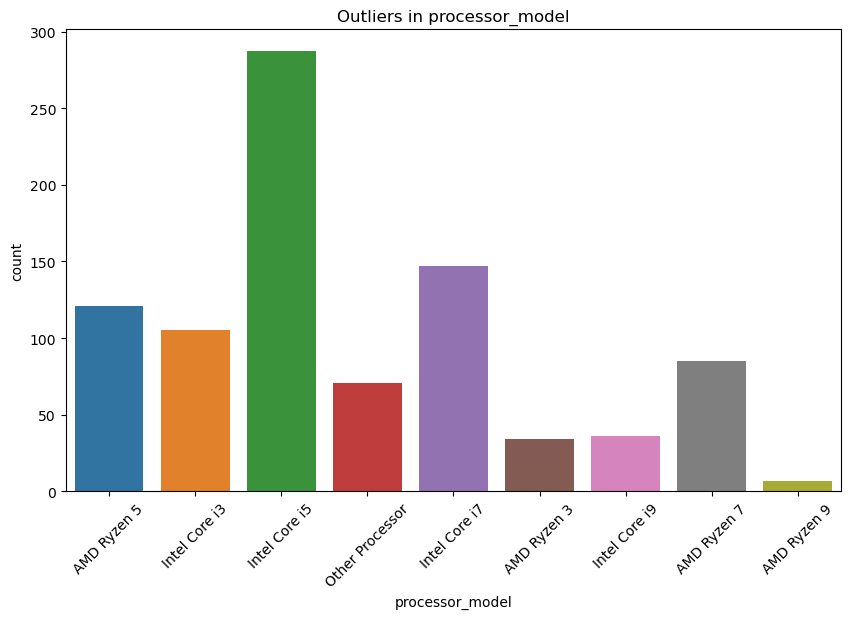

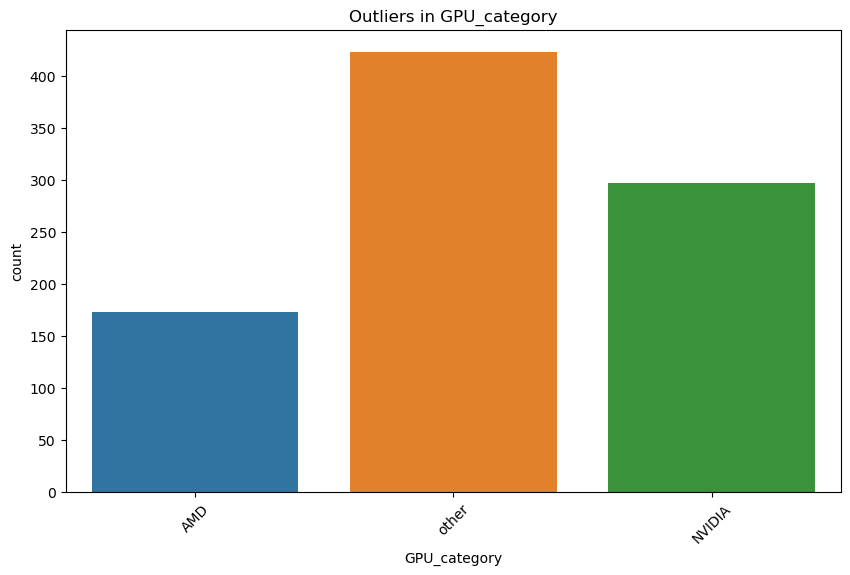

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns
columns = ['brand', 'price', 'cpu_core', 'Ram', 'Ram_type', 'ROM', 'ROM_type',
           'display_size', 'OS', 'warranty', 'processor_generation',
           'processor_model', 'GPU_category']

# Loop through each column and plot
for column in columns:
    plt.figure(figsize=(10, 6))
    if df[column].dtype == 'object':
        # For categorical columns, use countplot
        sns.countplot(x=column, data=df)
    else:
        # For numerical columns, use boxplot or histogram
        if df[column].nunique() > 10:
            # For continuous data with many unique values, use histogram
            sns.histplot(df[column], kde=True)
        else:
            # For discrete or categorical-like data, use boxplot
            sns.boxplot(x=column, data=df)
    plt.title(f'Outliers in {column}')
    plt.xticks(rotation=45)
    plt.show()


In [51]:
for column in df.columns:
    unique_count = df[column].value_counts().count()
    print(f"Unique values count for column '{column}': {unique_count}")

Unique values count for column 'brand': 30
Unique values count for column 'price': 464
Unique values count for column 'cpu_core': 11
Unique values count for column 'Ram': 7
Unique values count for column 'Ram_type': 12
Unique values count for column 'ROM': 7
Unique values count for column 'ROM_type': 2
Unique values count for column 'display_size': 18
Unique values count for column 'OS': 12
Unique values count for column 'warranty': 4
Unique values count for column 'cluster': 4
Unique values count for column 'processor_generation': 12
Unique values count for column 'processor_model': 9
Unique values count for column 'GPU_category': 3


In [52]:
df.select_dtypes('object').columns

Index(['brand', 'cpu_core', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'OS',
       'processor_generation', 'processor_model', 'GPU_category'],
      dtype='object')

In [53]:

df['processor_generation'].replace('Other', 0, inplace=True)

In [54]:
df.head()

,brand,price,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
0,HP,49900,6,8,DDR4,512,SSD,15.6,Windows 11,1,2,5.0,AMD Ryzen 5,AMD
1,HP,39900,6,8,DDR4,512,SSD,15.6,Windows 11,1,2,12.0,Intel Core i3,other
2,Acer,26990,2,8,DDR4,512,SSD,14.0,Windows 11,1,2,11.0,Intel Core i3,other
3,Lenovo,59729,12,16,LPDDR5,512,SSD,14.0,Windows 11,1,2,12.0,Intel Core i5,other
4,Apple,69990,8,8,DDR4,256,SSD,13.3,Mac,1,0,0.0,Other Processor,other


In [55]:
df.to_csv('laptop_tepm.csv')

In [56]:
label_encoder = LabelEncoder()
df['GPU_category'] = label_encoder.fit_transform(df['GPU_category'])
df['brand'] = label_encoder.fit_transform(df['brand'])
df['Ram_type'] = label_encoder.fit_transform(df['Ram_type'])
df['ROM_type'] = label_encoder.fit_transform(df['ROM_type'])
df['ROM'] = label_encoder.fit_transform(df['ROM'])
df['OS'] = label_encoder.fit_transform(df['OS'])
df['processor_model'] = label_encoder.fit_transform(df['processor_model'])

In [57]:
df.sample(3)

,brand,price,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
251,3,86189,8,16,4,5,1,17.3,11,1,0,6.0,2,1
341,3,79990,10,16,8,5,1,13.3,11,1,0,13.0,5,2
89,3,30990,2,8,2,5,1,14.0,11,1,2,11.0,4,2


In [58]:
df.processor_generation.value_counts()

processor_generation
12.0    214
13.0    207
11.0    132
7.0     125
5.0     101
0.0      55
10.0     18
6.0      17
3.0      16
8.0       4
9.0       2
4.0       2
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 893 non-null    int32  
 1   price                 893 non-null    int64  
 2   cpu_core              893 non-null    object 
 3   Ram                   893 non-null    object 
 4   Ram_type              893 non-null    int32  
 5   ROM                   893 non-null    int32  
 6   ROM_type              893 non-null    int32  
 7   display_size          893 non-null    float64
 8   OS                    893 non-null    int32  
 9   warranty              893 non-null    int64  
 10  cluster               893 non-null    int32  
 11  processor_generation  893 non-null    float64
 12  processor_model       893 non-null    int32  
 13  GPU_category          893 non-null    int32  
dtypes: float64(2), int32(8), int64(2), object(2)
memory usage: 69.9+ KB


In [60]:
df.columns

Index(['brand', 'price', 'cpu_core', 'Ram', 'Ram_type', 'ROM', 'ROM_type',
       'display_size', 'OS', 'warranty', 'cluster', 'processor_generation',
       'processor_model', 'GPU_category'],
      dtype='object')

In [61]:
df.head()

,brand,price,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
0,9,49900,6,8,2,5,1,15.6,11,1,2,5.0,1,0
1,9,39900,6,8,2,5,1,15.6,11,1,2,12.0,4,2
2,1,26990,2,8,2,5,1,14.0,11,1,2,11.0,4,2
3,14,59729,12,16,8,5,1,14.0,11,1,2,12.0,5,2
4,2,69990,8,8,2,3,1,13.3,4,1,0,0.0,8,2


In [62]:
df['processor_generation'].value_counts()

processor_generation
12.0    214
13.0    207
11.0    132
7.0     125
5.0     101
0.0      55
10.0     18
6.0      17
3.0      16
8.0       4
9.0       2
4.0       2
Name: count, dtype: int64

In [63]:
df.select_dtypes('object').columns


Index(['cpu_core', 'Ram'], dtype='object')

In [64]:
columns_to_convert = ['cpu_core', 'Ram', 'ROM']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [65]:
df.head()

,brand,price,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
0,9,49900,6.0,8.0,2,5.0,1,15.6,11,1,2,5.0,1,0
1,9,39900,6.0,8.0,2,5.0,1,15.6,11,1,2,12.0,4,2
2,1,26990,2.0,8.0,2,5.0,1,14.0,11,1,2,11.0,4,2
3,14,59729,12.0,16.0,8,5.0,1,14.0,11,1,2,12.0,5,2
4,2,69990,8.0,8.0,2,3.0,1,13.3,4,1,0,0.0,8,2


In [66]:
df.dtypes

brand                     int32
price                     int64
cpu_core                float64
Ram                     float64
Ram_type                  int32
ROM                     float64
ROM_type                  int32
display_size            float64
OS                        int32
warranty                  int64
cluster                   int32
processor_generation    float64
processor_model           int32
GPU_category              int32
dtype: object

In [67]:
df.columns

Index(['brand', 'price', 'cpu_core', 'Ram', 'Ram_type', 'ROM', 'ROM_type',
       'display_size', 'OS', 'warranty', 'cluster', 'processor_generation',
       'processor_model', 'GPU_category'],
      dtype='object')

In [68]:
df.head()

,brand,price,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
0,9,49900,6.0,8.0,2,5.0,1,15.6,11,1,2,5.0,1,0
1,9,39900,6.0,8.0,2,5.0,1,15.6,11,1,2,12.0,4,2
2,1,26990,2.0,8.0,2,5.0,1,14.0,11,1,2,11.0,4,2
3,14,59729,12.0,16.0,8,5.0,1,14.0,11,1,2,12.0,5,2
4,2,69990,8.0,8.0,2,3.0,1,13.3,4,1,0,0.0,8,2


In [69]:
df.head()

,brand,price,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,cluster,processor_generation,processor_model,GPU_category
0,9,49900,6.0,8.0,2,5.0,1,15.6,11,1,2,5.0,1,0
1,9,39900,6.0,8.0,2,5.0,1,15.6,11,1,2,12.0,4,2
2,1,26990,2.0,8.0,2,5.0,1,14.0,11,1,2,11.0,4,2
3,14,59729,12.0,16.0,8,5.0,1,14.0,11,1,2,12.0,5,2
4,2,69990,8.0,8.0,2,3.0,1,13.3,4,1,0,0.0,8,2


In [70]:
df.drop('cluster',axis=1,inplace=True)

# Model selection,Traning & Evaluation

In [71]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f'R2 Score: {r2}')
r2 = mean_absolute_error(y_test, y_pred)

print(f'mean_absolute_error: {r2}')

Mean Squared Error: 917949532.0426997
R2 Score: 0.7321141692178756
mean_absolute_error: 21710.799124780508


In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.1)  # Alpha is the regularization parameter (lambda)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso MSE:", lasso_mse)

# Ridge Regression (L2 regularization)
ridge = Ridge(alpha=0.1)  # Alpha is the regularization parameter (lambda)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge MSE:", ridge_mse)

Lasso MSE: 917950966.4822224
Ridge MSE: 917954452.1162434


In [74]:

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1)  # Output layer
])

model.compile(optimizer='nadam', loss='mse', metrics=['mae'])

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)



Epoch 1/100


18/18 [==============================] - 3s 36ms/step - loss: 10463356928.0000 - mae: 81576.9062 - val_loss: 9403919360.0000 - val_mae: 76257.2812
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 10459420672.0000 - mae: 81555.5547 - val_loss: 9398531072.0000 - val_mae: 76227.1719
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 10451747840.0000 - mae: 81513.2578 - val_loss: 9388134400.0000 - val_mae: 76168.2969
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 10437111808.0000 - mae: 81434.0859 - val_loss: 9369337856.0000 - val_mae: 76060.8281
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 10411927552.0000 - mae: 81293.3672 - val_loss: 9337600000.0000 - val_mae: 75877.3984
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 10371045376.0000 - mae: 81063.0156 - val_loss: 9287880704.0000 - val_mae: 75586.7578
Epoch 7/100
18/18 [============================

18/18 [==============================] - 0s 4ms/step - loss: 2681459712.0000 - mae: 34864.2148 - val_loss: 2166087168.0000 - val_mae: 31987.0625
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 2668377856.0000 - mae: 34734.4453 - val_loss: 2151484672.0000 - val_mae: 31896.7930
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 2655764480.0000 - mae: 34631.9805 - val_loss: 2137841408.0000 - val_mae: 31835.0273
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 2642823168.0000 - mae: 34560.0625 - val_loss: 2122624000.0000 - val_mae: 31717.2344
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 2629740800.0000 - mae: 34501.2422 - val_loss: 2109128832.0000 - val_mae: 31704.1055
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 2617264640.0000 - mae: 34407.6055 - val_loss: 2094744320.0000 - val_mae: 31614.9023
Epoch 53/100
18/18 [==============================] - 0s 4ms/step

Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 1963513856.0000 - mae: 29518.7715 - val_loss: 1341749760.0000 - val_mae: 25914.0703
Epoch 100/100
6/6 [==============================] - 0s 2ms/step
R2 Score: 0.5124076105487152


In [75]:
model.fit(X_train, y_train)
    
    # Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
    # Calculate R^2 scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f' train_r2 = {train_r2}') 
print(f'test_r2 = {test_r2}')

6/6 [==============================] - 0s 2ms/step
 train_r2 = 0.5230834794749886
test_r2 = 0.5182327900754088


In [76]:
X_train.shape[1]

12

In [77]:

model = tf.keras.Sequential([
    layers.Dense(1024, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)  # Output layer
])

model.compile(optimizer='nadam', loss='mse', metrics=['mae'])

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Epoch 1/100
18/18 [==============================] - 2s 20ms/step - loss: 10411216896.0000 - mae: 81284.4297 - val_loss: 9200535552.0000 - val_mae: 75033.7031
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 9690058752.0000 - mae: 76900.9141 - val_loss: 7625229312.0000 - val_mae: 64897.9297
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 6848611840.0000 - mae: 56944.5938 - val_loss: 3778575104.0000 - val_mae: 33886.5195
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 3534083072.0000 - mae: 36601.0469 - val_loss: 2534970880.0000 - val_mae: 36722.3828
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 2902715648.0000 - mae: 38609.0508 - val_loss: 2326255872.0000 - val_mae: 33096.5430
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 2772546560.0000 - mae: 35064.8867 - val_loss: 2189215744.0000 - val_mae: 32031.9648
Epoch 7/100
18/18 [==============================] -

In [78]:
model.fit(X_train, y_train)
    
    # Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
    # Calculate R^2 scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f' train_r2 = {train_r2}') 
print(f'test_r2 = {test_r2}')

6/6 [==============================] - 0s 2ms/step
 train_r2 = 0.6967236137535368
test_r2 = 0.7181825647050446


In [79]:

# Define a function to compute the mean squared error (MSE) or mean absolute error (MAE)
def evaluate_model(y_true, y_pred, metric='mse'):
    if metric == 'mse':
        return mean_squared_error(y_true, y_pred)
    elif metric == 'mae':
        return mean_absolute_error(y_true, y_pred)
    else:
        raise ValueError("Invalid metric. Use 'mse' or 'mae'.")

# Define a function to create a simple neural network model for regression
def create_model(activation):
    model = tf.keras.Sequential([
    layers.Dense(64, activation=activation, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.Dense(64, activation=activation, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.Dense(1) 
    ])
    return model

activations = ['relu', 'sigmoid', 'tanh', 'elu', 'softmax']  # You can add more as needed
results = {}

# Train models with different activation functions
for activation in activations:
    model = create_model(activation)
    model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    y_pred = model.predict(X_test)
    mse = evaluate_model(y_test, y_pred, metric='mse')  # Compute MSE
    mae = evaluate_model(y_test, y_pred, metric='mae')  # Compute MAE
    results[activation] = {'mse': mse, 'mae': mae}

# Print results
for activation, metrics in results.items():
    print(f"Activation: {activation}, MSE: {metrics['mse']}, MAE: {metrics['mae']}")


6/6 [==============================] - 0s 5ms/step
Activation: relu, MSE: 8850060405.712833, MAE: 73937.32243747817
Activation: sigmoid, MSE: 9425322991.76498, MAE: 77451.13770424188
Activation: tanh, MSE: 9424170331.26017, MAE: 77443.69661818136
Activation: elu, MSE: 8721330185.202566, MAE: 73139.62073504059
Activation: softmax, MSE: 9427329534.23766, MAE: 77464.08812157685


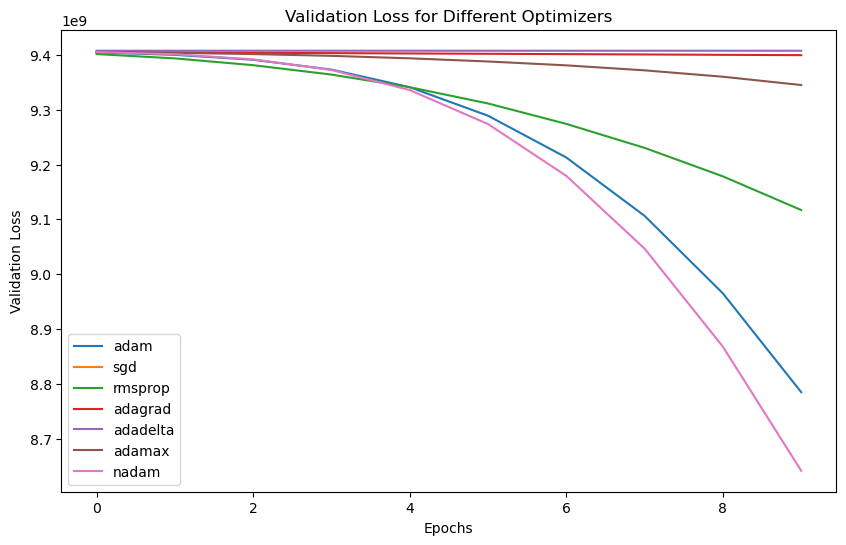

In [80]:
def create_model():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer
    ])
    return model

# Define input shape (number of features)
input_shape = X_train.shape[1]

optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
results = {}

for optimizer in optimizers:
    model = create_model()  # Replace with your model creation code
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    results[optimizer] = history.history['val_loss']
    
# Plot validation loss for each optimizer
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for optimizer, loss in results.items():
    plt.plot(loss, label=optimizer)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss for Different Optimizers')
plt.show()


In [81]:


# Define the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', kernel_regularizer=regularizers.l1_l2( l2=0.0001)),
    layers.Dense(64, activation='elu', kernel_regularizer=regularizers.l1_l2( l2=0.0001)),
    layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='nadam', loss='mse', metrics=['mae'])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=700, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Epoch 1/700
18/18 [==============================] - 2s 14ms/step - loss: 10463574016.0000 - mae: 81576.5078 - val_loss: 9403950080.0000 - val_mae: 76254.9375
Epoch 2/700
18/18 [==============================] - 0s 5ms/step - loss: 10459175936.0000 - mae: 81551.4297 - val_loss: 9398268928.0000 - val_mae: 76221.7969
Epoch 3/700
18/18 [==============================] - 0s 4ms/step - loss: 10451390464.0000 - mae: 81507.8125 - val_loss: 9388213248.0000 - val_mae: 76163.5156
Epoch 4/700
18/18 [==============================] - 0s 5ms/step - loss: 10437618688.0000 - mae: 81429.9531 - val_loss: 9370163200.0000 - val_mae: 76058.5078
Epoch 5/700
18/18 [==============================] - 0s 5ms/step - loss: 10413491200.0000 - mae: 81294.1094 - val_loss: 9339915264.0000 - val_mae: 75881.8672
Epoch 6/700
18/18 [==============================] - 0s 4ms/step - loss: 10374156288.0000 - mae: 81072.2734 - val_loss: 9292708864.0000 - val_mae: 75604.9922
Epoch 7/700
18/18 [==============================] 

Epoch 53/700
18/18 [==============================] - 0s 5ms/step - loss: 2365511680.0000 - mae: 31385.8730 - val_loss: 1802332160.0000 - val_mae: 27976.8457
Epoch 54/700
18/18 [==============================] - 0s 5ms/step - loss: 2328917248.0000 - mae: 31024.9355 - val_loss: 1763840128.0000 - val_mae: 27660.9062
Epoch 55/700
18/18 [==============================] - 0s 5ms/step - loss: 2293542912.0000 - mae: 30951.9258 - val_loss: 1723441152.0000 - val_mae: 27429.4727
Epoch 56/700
18/18 [==============================] - 0s 5ms/step - loss: 2253084416.0000 - mae: 30551.8535 - val_loss: 1683056512.0000 - val_mae: 26941.9512
Epoch 57/700
18/18 [==============================] - 0s 5ms/step - loss: 2217193728.0000 - mae: 30297.7969 - val_loss: 1644910976.0000 - val_mae: 26680.6133
Epoch 58/700
18/18 [==============================] - 0s 5ms/step - loss: 2182327040.0000 - mae: 30104.8477 - val_loss: 1603338496.0000 - val_mae: 26360.0742
Epoch 59/700
18/18 [==============================] 

Epoch 105/700
18/18 [==============================] - 0s 4ms/step - loss: 1313020672.0000 - mae: 23252.4219 - val_loss: 746747584.0000 - val_mae: 19450.6074
Epoch 106/700
18/18 [==============================] - 0s 4ms/step - loss: 1309223936.0000 - mae: 23269.4297 - val_loss: 745173056.0000 - val_mae: 19489.2656
Epoch 107/700
18/18 [==============================] - 0s 4ms/step - loss: 1308225280.0000 - mae: 23188.3066 - val_loss: 736802368.0000 - val_mae: 19280.8105
Epoch 108/700
18/18 [==============================] - 0s 4ms/step - loss: 1305242880.0000 - mae: 23214.3320 - val_loss: 740509888.0000 - val_mae: 19492.7910
Epoch 109/700
18/18 [==============================] - 0s 5ms/step - loss: 1300359808.0000 - mae: 23245.6348 - val_loss: 741526208.0000 - val_mae: 19583.5430
Epoch 110/700
18/18 [==============================] - 0s 5ms/step - loss: 1299538688.0000 - mae: 23238.0215 - val_loss: 736515136.0000 - val_mae: 19496.3535
Epoch 111/700
18/18 [==============================]

Epoch 157/700
18/18 [==============================] - 0s 6ms/step - loss: 1258748160.0000 - mae: 23281.8125 - val_loss: 703822528.0000 - val_mae: 19745.1875
Epoch 158/700
18/18 [==============================] - 0s 5ms/step - loss: 1259090560.0000 - mae: 23287.5840 - val_loss: 703902464.0000 - val_mae: 19760.4414
Epoch 159/700
18/18 [==============================] - 0s 5ms/step - loss: 1258835328.0000 - mae: 23268.2871 - val_loss: 702840192.0000 - val_mae: 19742.6426
Epoch 160/700
18/18 [==============================] - 0s 4ms/step - loss: 1258555520.0000 - mae: 23248.6348 - val_loss: 699248064.0000 - val_mae: 19650.6133
Epoch 161/700
18/18 [==============================] - 0s 4ms/step - loss: 1257079168.0000 - mae: 23239.4219 - val_loss: 702488960.0000 - val_mae: 19749.0840
Epoch 162/700
18/18 [==============================] - 0s 4ms/step - loss: 1258189568.0000 - mae: 23299.8340 - val_loss: 704437248.0000 - val_mae: 19814.9395
Epoch 163/700
18/18 [==============================]

Epoch 209/700
18/18 [==============================] - 0s 4ms/step - loss: 1242224000.0000 - mae: 23180.6797 - val_loss: 685876992.0000 - val_mae: 19583.5430
Epoch 210/700
18/18 [==============================] - 0s 5ms/step - loss: 1241720320.0000 - mae: 23163.0527 - val_loss: 686151936.0000 - val_mae: 19598.5898
Epoch 211/700
18/18 [==============================] - 0s 6ms/step - loss: 1240819968.0000 - mae: 23173.1406 - val_loss: 689231552.0000 - val_mae: 19692.3535
Epoch 212/700
18/18 [==============================] - 0s 5ms/step - loss: 1243632768.0000 - mae: 23181.5410 - val_loss: 689203904.0000 - val_mae: 19693.4160
Epoch 213/700
18/18 [==============================] - 0s 4ms/step - loss: 1241992192.0000 - mae: 23247.2227 - val_loss: 691340608.0000 - val_mae: 19748.2500
Epoch 214/700
6/6 [==============================] - 0s 2ms/step
R2 Score: 0.7166256845401051


In [82]:
model.fit(X_train, y_train)
    
    # Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
    # Calculate R^2 scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f' train_r2 = {train_r2}') 
print(f'test_r2 = {test_r2}')

6/6 [==============================] - 0s 1ms/step
 train_r2 = 0.699921380180429
test_r2 = 0.7171333916663217


In [83]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1)  # Output layer
])
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 1s 15ms/step - loss: 81574.5391 - mae: 81574.5312 - val_loss: 76253.4219 - val_mae: 76253.4141
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 81551.5625 - mae: 81551.5625 - val_loss: 76222.7500 - val_mae: 76222.7500
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 81509.3125 - mae: 81509.3047 - val_loss: 76164.1172 - val_mae: 76164.1172
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 81429.7266 - mae: 81429.7188 - val_loss: 76056.2656 - val_mae: 76056.2656
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 81290.2734 - mae: 81290.2656 - val_loss: 75875.2109 - val_mae: 75875.2109
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 81064.6172 - mae: 81064.6172 - val_loss: 75591.7266 - val_mae: 75591.7109
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 80720.1875 - mae: 80720.1719 - val_loss: 75170.2188

In [84]:

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1)  # Output layer
])
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mae'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 1s 15ms/step - loss: 81576.6797 - mae: 81575.5859 - val_loss: 76259.4375 - val_mae: 76258.3828
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 81560.9375 - mae: 81559.9297 - val_loss: 76235.8047 - val_mae: 76234.8281
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 81524.8438 - mae: 81523.8984 - val_loss: 76181.4297 - val_mae: 76180.4844
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 81446.7812 - mae: 81445.8359 - val_loss: 76071.1250 - val_mae: 76070.1562
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 81298.8828 - mae: 81297.8672 - val_loss: 75873.4297 - val_mae: 75872.3672
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 81048.3750 - mae: 81047.2266 - val_loss: 75551.8594 - val_mae: 75550.6484
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 80651.6250 - mae: 80650.3125 - val_loss: 75059.9297

In [85]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=45, max_samples=0.22)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R^2 scores
    train_r2 = mean_absolute_error(y_train, y_train_pred)
    test_r2 = mean_absolute_error(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
    print(f'{name}: T R^2 score = {train_r2}') 
    print(f'{name}: R^2 score = {test_r2}')
    print('***********************')

Linear Regression: T R^2 score = 22185.531299694318
Linear Regression: R^2 score = 21710.799124780508
***********************
Decision Tree: T R^2 score = 1726.6826330532213
Decision Tree: R^2 score = 16494.704950341402
***********************
Random Forest: T R^2 score = 13564.18989519141
Random Forest: R^2 score = 13496.38205679702
***********************


In [86]:
model =RandomForestRegressor( )

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f'{name}: T R^2 score = {train_r2}') 
print(f'{name}: R^2 score = {test_r2}') 

Random Forest: T R^2 score = 0.9617218412049601
Random Forest: R^2 score = 0.799563630393555


In [87]:
model =RandomForestRegressor(max_depth=15,random_state=35, max_samples=0.3)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f'{name}: T R^2 score = {train_r2}') 
print(f'{name}: R^2 score = {test_r2}')

Random Forest: T R^2 score = 0.8623413480472828
Random Forest: R^2 score = 0.8214388384176274


In [88]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:


# Define the additional models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=45, max_samples=0.22),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': cb.CatBoostRegressor(silent=True)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate mean absolute error scores
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Print the name of the model and its mean absolute error scores
    print(f'{name}: Train MAE = {train_mae}') 
    print(f'{name}: Test MAE = {test_mae}')
    print('***********************')


Linear Regression: Train MAE = 22185.531299694318
Linear Regression: Test MAE = 21710.799124780508
***********************
Decision Tree: Train MAE = 1726.6826330532213
Decision Tree: Test MAE = 15927.963795779018
***********************
Random Forest: Train MAE = 13564.18989519141
Random Forest: Test MAE = 13496.38205679702
***********************
Support Vector Machine: Train MAE = 37057.45103206573
Support Vector Machine: Test MAE = 34766.24586559704
***********************
K-Nearest Neighbors: Train MAE = 14172.395518207284
K-Nearest Neighbors: Test MAE = 16104.290502793296
***********************
Gradient Boosting: Train MAE = 10969.145142645015
Gradient Boosting: Test MAE = 13235.858220427308
***********************
AdaBoost: Train MAE = 29631.50490869506
AdaBoost: Test MAE = 33113.20058056161
***********************
Ridge Regression: Train MAE = 22180.752774931596
Ridge Regression: Test MAE = 21718.10985277118
***********************
Lasso Regression: Train MAE = 22185.230408336

CatBoost: Train MAE = 6488.598920650675
CatBoost: Test MAE = 12775.472300198133
***********************


In [90]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R^2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
    print(f'{name}: T R^2 score = {train_r2}') 
    print(f'{name}: R^2 score = {test_r2}')
    print('***********************')

Linear Regression: T R^2 score = 0.7074292029966732
Linear Regression: R^2 score = 0.7321141692178756
***********************
Decision Tree: T R^2 score = 0.991500880835812
Decision Tree: R^2 score = 0.6338287544100472
***********************
Random Forest: T R^2 score = 0.9605050089433012
Random Forest: R^2 score = 0.7993029708679559
***********************


In [91]:


# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=45)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_regressor, param_distributions=param_grid, 
                                   n_iter=100, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Extract the best model
best_model = random_search.best_estimator_

# Predictions on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate R-squared score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print R-squared scores
print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')


Train R^2: 0.8369752527275323
Test R^2: 0.6624622483672391


## MinMaxScaler, StandardScaler using check mean_absolute_error

In [92]:


minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

model = GradientBoostingRegressor(
    max_depth=3,
    min_samples_leaf=4 
)
model.fit(X_train_minmax, y_train) 
y_pred = model.predict(X_test_minmax) 
mse = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.841715499118812


In [93]:
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

model = GradientBoostingRegressor(
    max_depth=3,
    min_samples_leaf=4 
)  
model.fit(X_train_standard, y_train)  
y_pred = model.predict(X_test_standard)  # Alternatively, using Standard scaled features

mse = r2_score(y_test, y_pred)
print("r2_score:", mse)


r2_score: 0.8417154991188119


In [94]:
y_train_pred = model.predict(X_train_standard)
y_test_pred = model.predict(X_test_standard)
    
    # Calculate R^2 scores
train_r2 = mean_absolute_error(y_train, y_train_pred)
test_r2 = mean_absolute_error(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f'GradientBoostingRegressor: Tmean_absolute_error = {train_r2}') 
print(f'GradientBoostingRegressor: mean_absolute_error = {test_r2}')

GradientBoostingRegressor: Tmean_absolute_error = 12085.780528302654
GradientBoostingRegressor: mean_absolute_error = 13088.39483005034


In [95]:
y_train_pred = model.predict(X_train_minmax)
y_test_pred = model.predict(X_test_minmax)
    
    # Calculate R^2 scores
train_r2 = mean_absolute_error(y_train, y_train_pred)
test_r2 = mean_absolute_error(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f'GradientBoostingRegressor: Tmean_absolute_error = {train_r2}') 
print(f'GradientBoostingRegressor: mean_absolute_error = {test_r2}')

GradientBoostingRegressor: Tmean_absolute_error = 33905.06022592117
GradientBoostingRegressor: mean_absolute_error = 34233.82141552319


In [96]:
best1 =DecisionTreeRegressor(random_state=45)

best1.fit(X_train, y_train)
y_train_pred = best1.predict(X_train)
y_test_pred = best1.predict(X_test)
    
train_r2 = mean_absolute_error(y_train, y_train_pred)
test_r2 = mean_absolute_error(y_test, y_test_pred)
print(f'RandomForestRegressor: Tmean_absolute_error = {train_r2}') 
print(f'RandomForestRegressor: mean_absolute_error = {test_r2}')

RandomForestRegressor: Tmean_absolute_error = 1726.6826330532213
RandomForestRegressor: mean_absolute_error = 16126.170499689633


In [97]:
best2 =RandomForestRegressor(random_state=45, max_samples=0.2)

best2.fit(X_train, y_train)
y_train_pred = best2.predict(X_train)
y_test_pred = best2.predict(X_test)
    
train_r2 = mean_absolute_error(y_train, y_train_pred)
test_r2 = mean_absolute_error(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f'RandomForestRegressor: Tmean_absolute_error = {train_r2}') 
print(f'RandomForestRegressor: mean_absolute_error = {test_r2}')

RandomForestRegressor: Tmean_absolute_error = 13858.894257236225
RandomForestRegressor: mean_absolute_error = 13721.342105214151


In [98]:
best3 =GradientBoostingRegressor()

best3.fit(X_train, y_train)
y_train_pred = best3.predict(X_train)
y_test_pred = best3.predict(X_test)
    
train_r2 = mean_absolute_error(y_train, y_train_pred)
test_r2 = mean_absolute_error(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f'GradientBoostingRegressor: Tmean_absolute_error = {train_r2}') 
print(f'GradientBoostingRegressor: mean_absolute_error = {test_r2}')

GradientBoostingRegressor: Tmean_absolute_error = 10969.145142645015
GradientBoostingRegressor: mean_absolute_error = 13435.987076153342


# model selection & model prediction

In [99]:
best =GradientBoostingRegressor(
    max_depth=3,
    min_samples_leaf=4 
)

best.fit(X_train, y_train)
y_train_pred = best.predict(X_train)
y_test_pred = best.predict(X_test)
    
train_r2 = mean_absolute_error(y_train, y_train_pred)
test_r2 = mean_absolute_error(y_test, y_test_pred)
    
    # Print the name of the model and its R^2 score
print(f'RandomForestRegressor: Tmean_absolute_error = {train_r2}') 
print(f'RandomForestRegressor: mean_absolute_error = {test_r2}')

RandomForestRegressor: Tmean_absolute_error = 12085.780528302652
RandomForestRegressor: mean_absolute_error = 13082.834330347814


In [100]:
best.predict([[12,10.0,16.0,6,5.0,1,14.0,11,1,12.0,5,2]])

array([68378.62414555])

In [101]:
predic = [[14,6.0,8.0,2,5.0,1,15.6,11,1,5.0,1,1]]
best.predict(predic)

array([52061.71105632])

In [102]:
X_test.sample(2)

,brand,cpu_core,Ram,Ram_type,ROM,ROM_type,display_size,OS,warranty,processor_generation,processor_model,GPU_category
321,3,24.0,16.0,4,0.0,1,16.0,11,1,13.0,7,1
823,6,14.0,32.0,4,0.0,1,15.6,11,1,13.0,6,1


In [103]:
# 83090
best.predict([[6,12.0,16.0,8,5.0,1,13.3,11,1,13.0,5,2]])

array([93293.22601439])

In [104]:
# 66990
best.predict([[12,10.0,16.0,6,5.0,1,14.0,11,1,12.0,5,2]])

array([68378.62414555])

In [105]:
# 79990
best.predict([[14,10.0,16.0,2,5.0,1,15.6,11,1,12.0,6,2]])

array([86249.23231223])

# Model save 

In [106]:
import pickle as pk
with open('gradient_boosting_model.pkl', 'wb') as file:
    pk.dump(best_model, file)